## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [6]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Activation, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 30 # 訓練的 epochs 數量

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [26]:
model = Sequential()

# conv block 1
model.add(Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=x_train.shape[1:]) )
model.add(Conv2D(64, (3, 3), padding="same" , activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# conv block 2
model.add(Conv2D(128, (3, 3), padding='same',activation="relu"))
model.add(Conv2D(128, (3, 3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# conv block 3
model.add(Conv2D(256, (3, 3), padding='same',activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# dense block
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [27]:
opt = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=(x_test, y_test)
                    )


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 35s 691us/step - loss: 1.6050 - acc: 0.4491 - val_loss: 1.6009 - val_acc: 0.4788
Epoch 2/30
50000/50000 [==============================] - 33s 653us/step - loss: 1.1772 - acc: 0.5871 - val_loss: 1.5919 - val_acc: 0.5044
Epoch 3/30
50000/50000 [==============================] - 33s 652us/step - loss: 0.9756 - acc: 0.6609 - val_loss: 1.1822 - val_acc: 0.6161
Epoch 4/30
50000/50000 [==============================] - 32s 649us/step - loss: 0.8389 - acc: 0.7087 - val_loss: 0.9399 - val_acc: 0.6816
Epoch 5/30
50000/50000 [==============================] - 32s 649us/step - loss: 0.7342 - acc: 0.7428 - val_loss: 0.8678 - val_acc: 0.7131
Epoch 6/30
50000/50000 [==============================] - 33s 652us/step - loss: 0.6444 - acc: 0.7768 - val_loss: 0.8460 - val_acc: 0.7191
Epoch 7/30
50000/50000 [==============================] - 33s 652us/step - loss: 0.5705 - acc: 0.8015 - val_loss: 0.

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7012139758586884
Test accuracy: 0.8242


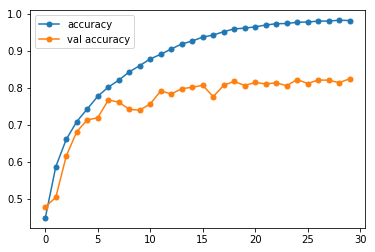

In [30]:
plt.plot(history.history['acc'],ms=5,marker='o',label='accuracy')
plt.plot(history.history['val_acc'],ms=5,marker='o',label='val accuracy')
plt.legend()
plt.show()